In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import torchvision
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import time
import os
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/LTU (1)/ADL_share/Project/data'

import torchvision.transforms as transforms

transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=path+'/train', transform=transforms)
val_dataset = ImageFolder(root=path+'/val', transform=transforms)
test_dataset = ImageFolder(root=path+'/test', transform=transforms)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

dataloaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
num_classes = 2
batch_size = 8

feature_extract = False

model_ft = models.alexnet(pretrained=True)

num_ftrs = model_ft.classifier[6].in_features
model_ft = models.alexnet(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs,2048)
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(2048,1024))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(1024,512))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(512,256))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(256,2))
input_size = 224





'''
model_ft.classifier[6] = nn.Linear(num_ftrs,2048)
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(2048,256))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(256,2))
'''
'''
model_ft.classifier  = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(num_ftrs,2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048,256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256,2)
)
'''



input_size = 224


print(model_ft)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = model_ft.to(device)

params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)
'''
params_to_update = []
for name,param in model_ft.named_parameters():
        if param.requires_grad == True and 'classifier' in name:
            params_to_update.append(param)
            print("\t",name)
'''

optimizer_ft = optim.Adam(params_to_update, lr=0.0001)

Params to learn:
	 features.0.weight
	 features.0.bias
	 features.3.weight
	 features.3.bias
	 features.6.weight
	 features.6.bias
	 features.8.weight
	 features.8.bias
	 features.10.weight
	 features.10.bias
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
	 classifier.9.weight
	 classifier.9.bias
	 classifier.12.weight
	 classifier.12.bias
	 classifier.15.weight
	 classifier.15.bias
	 classifier.18.weight
	 classifier.18.bias


In [ ]:
criterion = nn.CrossEntropyLoss()
num_epochs = 15

model_ft, hist = train_model(model_ft,
                             dataloaders,
                             criterion,
                             optimizer_ft,
                             num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.3559 Acc: 0.8349
val Loss: 0.7457 Acc: 0.6875

Epoch 1/14
----------
train Loss: 0.2780 Acc: 0.8900
val Loss: 0.9499 Acc: 0.6250

Epoch 2/14
----------
train Loss: 0.2546 Acc: 0.8995
val Loss: 0.9473 Acc: 0.5625

Epoch 3/14
----------
train Loss: 0.2285 Acc: 0.9139
val Loss: 1.0676 Acc: 0.6250

Epoch 4/14
----------
train Loss: 0.2142 Acc: 0.9176
val Loss: 1.4556 Acc: 0.5625

Epoch 5/14
----------
train Loss: 0.2215 Acc: 0.9135
val Loss: 0.9449 Acc: 0.8750

Epoch 6/14
----------
train Loss: 0.1963 Acc: 0.9264
val Loss: 0.9626 Acc: 0.6875

Epoch 7/14
----------
train Loss: 0.1943 Acc: 0.9273
val Loss: 0.8995 Acc: 0.6875

Epoch 8/14
----------
train Loss: 0.2183 Acc: 0.9218
val Loss: 0.6049 Acc: 0.6250

Epoch 9/14
----------
train Loss: 0.2059 Acc: 0.9225
val Loss: 1.9237 Acc: 0.5000

Epoch 10/14
----------
train Loss: 0.1817 Acc: 0.9317
val Loss: 1.4694 Acc: 0.5625

Epoch 11/14
----------
train Loss: 0.1979 Acc: 0.9296
val Loss: 0.7283 Acc: 0.5625

Ep

In [ ]:
torch.save(model_ft.state_dict(), './alexnet_finetuned2.pth')

In [ ]:

model_ft = models.alexnet(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features
model_ft = models.alexnet(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs,2048)
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(2048,1024))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(1024,512))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(512,256))
model_ft.classifier.append(nn.ReLU(inplace=True))
model_ft.classifier.append(nn.Dropout(0.5))
model_ft.classifier.append(nn.Linear(256,2))
input_size = 224

model_ft.load_state_dict(torch.load('./alexnet_finetuned2.pth'))

'''
model_ft = models.alexnet(pretrained=True)

num_ftrs = model_ft.classifier[6].in_features

model_ft.classifier  = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(num_ftrs,2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(2048,256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256,2)
)

model_ft.load_state_dict(torch.load('./alexnet_finetuned_onlyClassifier.pth'))
'''


"\nmodel_ft = models.alexnet(pretrained=True)\n\nnum_ftrs = model_ft.classifier[6].in_features\n\nmodel_ft.classifier  = nn.Sequential(\n            nn.Dropout(),\n            nn.Linear(256 * 6 * 6, 4096),\n            nn.ReLU(inplace=True),\n            nn.Dropout(),\n            nn.Linear(4096, 4096),\n            nn.ReLU(inplace=True),\n            nn.Linear(num_ftrs,2048),\n            nn.ReLU(inplace=True),\n            nn.Dropout(0.5),\n            nn.Linear(2048,256),\n            nn.ReLU(inplace=True),\n            nn.Dropout(0.2),\n            nn.Linear(256,2)\n)\n\nmodel_ft.load_state_dict(torch.load('./alexnet_finetuned_onlyClassifier.pth'))\n"

In [ ]:
correct, total = 0, 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct // total} %')

Accuracy on test set: 87 %


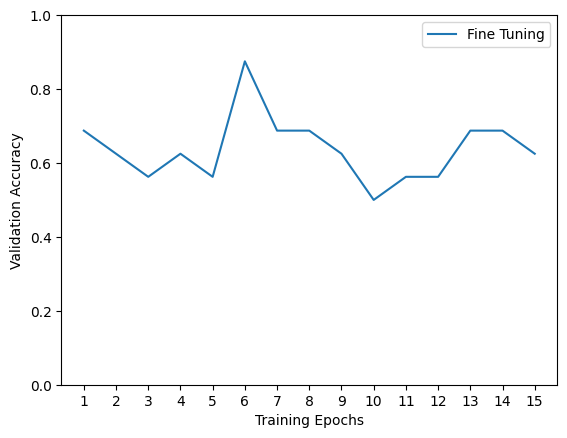

In [ ]:
fhist = []

fhist = [h.cpu().numpy() for h in hist]

plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
#plt.plot(range(1,num_epochs+1),ohist,label="Fine Tuning")
plt.plot(range(1,num_epochs+1),fhist,label="Fine Tuning")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()